In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CarPrice.csv')
df.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,NaN,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          191 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           196 non-null    object 
 6   drivewheel        196 non-null    object 
 7   enginelocation    193 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         188 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [4]:
df.shape
# no of rows and colomns

(205, 25)

In [5]:
missing_data = 0
total_data = 25*205
missing_data = df.isnull().sum()

In [6]:
len(missing_data)

25

In [7]:
for column, count in missing_data.items():
    print(f"{column}: {count}")

symboling: 0
CarName: 0
fueltype: 14
aspiration: 0
doornumber: 0
carbody: 9
drivewheel: 9
enginelocation: 12
wheelbase: 0
carlength: 17
carwidth: 0
carheight: 0
curbweight: 0
enginetype: 0
cylindernumber: 0
enginesize: 0
fuelsystem: 0
boreratio: 0
stroke: 0
compressionratio: 0
horsepower: 0
peakrpm: 0
citympg: 0
highwaympg: 0
price: 0


In [8]:
all_missing_data = missing_data.sum()
print(all_missing_data)

61


In [9]:
# 3. percent missing data
total_data = 25*205
percentage_of_missing_data = (all_missing_data/total_data)*100
print(percentage_of_missing_data)

1.1902439024390243


In [10]:
# 4. Symboling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          191 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           196 non-null    object 
 6   drivewheel        196 non-null    object 
 7   enginelocation    193 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         188 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [11]:
# 5. Range
symboling_min = df['symboling'].min()
symboling_max = df['symboling'].max()
symboling_range = symboling_max - symboling_min
print("Range of symboling column:", symboling_range)

Range of symboling column: 5


In [12]:
# 6 UNique carnames
Unique_car_names = df['CarName'].nunique()
Unique_car_names

147

In [13]:
# 7. drop carname 
df.drop('CarName', axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,NaN,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# 8. UNique fueltype values
df['fueltype'].value_counts()
df['fueltype'].nunique()

2

In [15]:
most_fuel = df['fueltype'].value_counts()
print(most_fuel) 
most_frequent_fuel = most_fuel.index[0]
print(most_frequent_fuel)

gas       171
diesel     20
Name: fueltype, dtype: int64
gas


In [16]:
df['fueltype'].fillna(most_frequent_fuel, inplace = True)
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [17]:

df['fueltype'].map({'gas': 1, 'diesel': 0})

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fueltype, Length: 205, dtype: int64

In [18]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,NaN,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
#9. Map fueltype
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})

In [20]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,std,four,sedan,4wd,front,99.4,NaN,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
df.tail()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,1,std,four,sedan,NaN,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,turbo,four,sedan,NaN,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,1,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [22]:
df['fueltype'].value_counts()

1    185
0     20
Name: fueltype, dtype: int64

In [23]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [24]:
df[df['aspiration'].isna()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [25]:
# 10. Map aspiration
df['aspiration'] = df['aspiration'].map({'std' : 1, 'turbo': 0})
df['aspiration'].value_counts()

1    168
0     37
Name: aspiration, dtype: int64

In [26]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [27]:
df[df['doornumber'].isna()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [28]:
# 11. Map doornumber
df['doornumber'] = df['doornumber'].map({'four' : 1, 'two': 0})
df['doornumber'].value_counts()

1    115
0     90
Name: doornumber, dtype: int64

In [29]:
carbody_count = df.groupby(["carbody","doornumber"])["carbody"].count()
print(carbody_count)

carbody      doornumber
convertible  0              6
hardtop      0              8
hatchback    0             58
             1             10
sedan        0             13
             1             77
wagon        1             24
Name: carbody, dtype: int64


In [30]:
grouped = df.groupby('doornumber')

twodoor_carbody = grouped.get_group(0)['carbody'].value_counts().index[0]
fourdoor_carbody = grouped.get_group(1)['carbody'].value_counts().index[0]
print(twodoor_carbody,fourdoor_carbody )

hatchback sedan


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           196 non-null    object 
 5   drivewheel        196 non-null    object 
 6   enginelocation    193 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         188 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [32]:
df.loc[(df['doornumber'] == 0) & (df['carbody'].isna()), 'carbody'] = twodoor_carbody
df.loc[(df['doornumber'] == 1) & (df['carbody'].isna()), 'carbody'] = fourdoor_carbody
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        196 non-null    object 
 6   enginelocation    193 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         188 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [33]:
carbody_count = df.groupby(["carbody","doornumber"])["carbody"].count()
print(carbody_count)

carbody      doornumber
convertible  0              6
hardtop      0              8
hatchback    0             63
             1             10
sedan        0             13
             1             81
wagon        1             24
Name: carbody, dtype: int64


In [34]:
# 12. Carbody frequency
carbody_count = df.groupby(["carbody"])["carbody"].count()
print(carbody_count)

carbody
convertible     6
hardtop         8
hatchback      73
sedan          94
wagon          24
Name: carbody, dtype: int64


In [35]:
# 13. Carbody one hot vector
df_carbody = pd.get_dummies(df['carbody'], prefix = 'carbody')
df[df_carbody.columns] = df_carbody
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,1,1,0,convertible,rwd,front,88.6,168.8,64.1,...,111,5000,21,27,13495.0,1,0,0,0,0
1,3,1,1,0,convertible,rwd,front,88.6,168.8,64.1,...,111,5000,21,27,16500.0,1,0,0,0,0
2,1,1,1,0,hatchback,rwd,front,94.5,171.2,65.5,...,154,5000,19,26,16500.0,0,0,1,0,0
3,2,1,1,1,sedan,fwd,front,99.8,176.6,66.2,...,102,5500,24,30,13950.0,0,0,0,1,0
4,2,1,1,1,sedan,4wd,front,99.4,NaN,66.4,...,115,5500,18,22,17450.0,0,0,0,1,0


In [36]:
df.drop('carbody' , axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,1,1,0,rwd,front,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.0,1,0,0,0,0
1,3,1,1,0,rwd,front,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.0,1,0,0,0,0
2,1,1,1,0,rwd,front,94.5,171.2,65.5,52.4,...,154,5000,19,26,16500.0,0,0,1,0,0
3,2,1,1,1,fwd,front,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.0,0,0,0,1,0
4,2,1,1,1,4wd,front,99.4,NaN,66.4,54.3,...,115,5500,18,22,17450.0,0,0,0,1,0


In [37]:
df['drivewheel'].value_counts()

fwd    114
rwd     74
4wd      8
Name: drivewheel, dtype: int64

In [38]:
index_drivewheel = df[df['drivewheel'].isna()].index
index_drivewheel

Int64Index([92, 93, 138, 139, 140, 173, 174, 200, 201], dtype='int64')

In [39]:
df.loc[index_drivewheel, 'drivewheel'] = 'fwd'

In [40]:
# 14. drivewheel frequency
df['drivewheel'].value_counts()

fwd    123
rwd     74
4wd      8
Name: drivewheel, dtype: int64

In [41]:
# 15. drivewheel one hot vector
df_drivewheel = pd.get_dummies(df['drivewheel'], prefix = 'drivewheel')
df[df_drivewheel.columns] = df_drivewheel
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,3,1,1,0,rwd,front,88.6,168.8,64.1,48.8,...,27,13495.0,1,0,0,0,0,0,0,1
1,3,1,1,0,rwd,front,88.6,168.8,64.1,48.8,...,27,16500.0,1,0,0,0,0,0,0,1
2,1,1,1,0,rwd,front,94.5,171.2,65.5,52.4,...,26,16500.0,0,0,1,0,0,0,0,1
3,2,1,1,1,fwd,front,99.8,176.6,66.2,54.3,...,30,13950.0,0,0,0,1,0,0,1,0
4,2,1,1,1,4wd,front,99.4,NaN,66.4,54.3,...,22,17450.0,0,0,0,1,0,1,0,0


In [42]:
df.drop('drivewheel' , axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,3,1,1,0,front,88.6,168.8,64.1,48.8,2548,...,27,13495.0,1,0,0,0,0,0,0,1
1,3,1,1,0,front,88.6,168.8,64.1,48.8,2548,...,27,16500.0,1,0,0,0,0,0,0,1
2,1,1,1,0,front,94.5,171.2,65.5,52.4,2823,...,26,16500.0,0,0,1,0,0,0,0,1
3,2,1,1,1,front,99.8,176.6,66.2,54.3,2337,...,30,13950.0,0,0,0,1,0,0,1,0
4,2,1,1,1,front,99.4,NaN,66.4,54.3,2824,...,22,17450.0,0,0,0,1,0,1,0,0


In [43]:
df['enginelocation'].value_counts()

front    190
rear       3
Name: enginelocation, dtype: int64

In [44]:
index_engine = df[df['enginelocation'].isna()].index
index_engine

Int64Index([113, 114, 115, 129, 130, 131, 132, 133, 134, 135, 136, 137], dtype='int64')

In [45]:
df.loc[index_engine,'enginelocation'] = 'front'
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [46]:
#16.Map engine location
df['enginelocation'] = df['enginelocation'].map({'front':1 , 'rear' : 0})
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,27,13495.0,1,0,0,0,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,27,16500.0,1,0,0,0,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,26,16500.0,0,0,1,0,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,30,13950.0,0,0,0,1,0,0,1,0
4,2,1,1,1,1,99.4,NaN,66.4,54.3,2824,...,22,17450.0,0,0,0,1,0,1,0,0


In [47]:
df['enginelocation'].value_counts()

1    202
0      3
Name: enginelocation, dtype: int64

<AxesSubplot: ylabel='Density'>

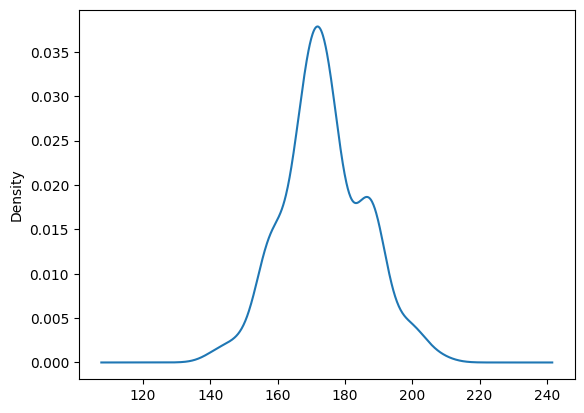

In [48]:
df['carlength'].plot(kind = 'kde')

In [49]:
#17. Map carlength with mean
df['carlength'].fillna(df['carlength'].mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   fueltype             205 non-null    int64  
 2   aspiration           205 non-null    int64  
 3   doornumber           205 non-null    int64  
 4   enginelocation       205 non-null    int64  
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    int64  
 10  enginetype           205 non-null    object 
 11  cylindernumber       205 non-null    object 
 12  enginesize           205 non-null    int64  
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

In [50]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [51]:
df['enginetype'] = df['enginetype'].map({'ohc' :1, 'ohcf':0,'ohcv':0,'dohc':0,'l':0,'rotor':0,'dohcv':0 })
df['enginetype'].value_counts()

1    148
0     57
Name: enginetype, dtype: int64

In [52]:
# 18. Mean enginetype
df['enginetype'].mean()

0.7219512195121951

In [53]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [54]:
index_fuelsystem = df.loc[df['fuelsystem'].isin(['idi', '1bbl', 'spdi', '4bbl','mfi','spfi'])].index
index_fuelsystem

Int64Index([ 29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  46,
             55,  56,  57,  63,  66,  67,  68,  69,  70,  79,  80,  82,  83,
             84,  87,  88,  90, 108, 110, 112, 114, 116, 119, 124, 158, 159,
            174, 182, 184, 187, 192, 203],
           dtype='int64')

In [55]:
df.loc[index_fuelsystem , 'fuelsystem'] = 'other'
df['fuelsystem'].value_counts()

mpfi     94
2bbl     66
other    45
Name: fuelsystem, dtype: int64

In [56]:
# 19. One hot vector fuelsystem
df_fuelsystem = pd.get_dummies(df['fuelsystem'], prefix = 'fuelsystem')
df[df_fuelsystem.columns ]= df_fuelsystem

df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi,fuelsystem_other
0,3,1,1,0,1,88.6,168.800000,64.1,48.8,2548,...,0,0,0,0,0,0,1,0,1,0
1,3,1,1,0,1,88.6,168.800000,64.1,48.8,2548,...,0,0,0,0,0,0,1,0,1,0
2,1,1,1,0,1,94.5,171.200000,65.5,52.4,2823,...,0,1,0,0,0,0,1,0,1,0
3,2,1,1,1,1,99.8,176.600000,66.2,54.3,2337,...,0,0,1,0,0,1,0,0,1,0
4,2,1,1,1,1,99.4,173.844681,66.4,54.3,2824,...,0,0,1,0,1,0,0,0,1,0


In [57]:
df.drop('fuelsystem' , axis = 1, inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi,fuelsystem_other
0,3,1,1,0,1,88.6,168.800000,64.1,48.8,2548,...,0,0,0,0,0,0,1,0,1,0
1,3,1,1,0,1,88.6,168.800000,64.1,48.8,2548,...,0,0,0,0,0,0,1,0,1,0
2,1,1,1,0,1,94.5,171.200000,65.5,52.4,2823,...,0,1,0,0,0,0,1,0,1,0
3,2,1,1,1,1,99.8,176.600000,66.2,54.3,2337,...,0,0,1,0,0,1,0,0,1,0
4,2,1,1,1,1,99.4,173.844681,66.4,54.3,2824,...,0,0,1,0,1,0,0,0,1,0


In [58]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [59]:
#20. Map cylindernumber
mapping_dict = {'four': 2, 'six': 4, 'five': 3, 'eight': 5, 'two': 0, 'three': 1, 'twelve': 6}
df['cylindernumber'] = df['cylindernumber'].map(mapping_dict)
df['cylindernumber'].value_counts()

2    159
4     24
3     11
5      5
0      4
1      1
6      1
Name: cylindernumber, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   fueltype             205 non-null    int64  
 2   aspiration           205 non-null    int64  
 3   doornumber           205 non-null    int64  
 4   enginelocation       205 non-null    int64  
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    int64  
 10  enginetype           205 non-null    int64  
 11  cylindernumber       205 non-null    int64  
 12  enginesize           205 non-null    int64  
 13  boreratio            205 non-null    float64
 14  stroke               205 non-null    float64
 15  compressionratio     205 non-null    flo

In [61]:
# 21. No of colomns
df.shape


(205, 32)

In [62]:
# LAB 4
#1
import pandas as pd

# create new target column
y = (df['price'] >= 10000).astype(int)

# drop 'price' column
X = df.drop('price', axis=1)


# calculate percentage of instances with y = 1
percentage_y_1 = 100 * y.mean()
print(f"Percentage of instances with y = 1: {percentage_y_1:.2f}%")


Percentage of instances with y = 1: 51.22%


In [63]:
#y = df['price']

In [64]:
# 3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the feature sets using MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


In [65]:
mean_curbweight = X_test['curbweight'].mean()
print(f"Mean of column 'curbweight' in X_test data frame: {mean_curbweight:.2f}")


Mean of column 'curbweight' in X_test data frame: 0.32


In [66]:
#4
proportion = y_train.value_counts()[1] / y_train.value_counts()[0]

print(f"The proportion of label 1 to label 0 in the training dataset is {proportion:.2f}")


The proportion of label 1 to label 0 in the training dataset is 1.10


In [67]:
#5
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(random_state=0)

# fit the model to the train dataset
logreg.fit(X_train, y_train)

# calculate the training score
training_score = logreg.score(X_train, y_train)

print(f"The training score of the logistic regression model is {training_score:.2f}")


The training score of the logistic regression model is 0.92


In [68]:
# 6. calculate the test score
test_score = logreg.score(X_test, y_test)

print(f"The test score of the logistic regression model is {test_score:.2f}")


The test score of the logistic regression model is 0.85


In [69]:
# 8. create a dataframe containing the new instance data

new_instance = pd.DataFrame({
    'symboling': [1.0],
    'fueltype': [1.0],
    'aspiration': [1.0],
    'doornumber': [0.4],
    'enginelocation': [1.0],
    'wheelbase': [0.6],
    'carlength': [0.5],
    'carwidth': [0.9],
    'carheight': [1.0],
    'curbweight': [0.4],
    'enginetype': [1.0],
    'cylindernumber': [0.7],
    'enginesize': [0.5],
    'boreratio': [1.0],
    'stroke': [0.6],
    'compressionratio': [0.2],
    'horsepower': [0.7],
    'peakrpm': [0.9],
    'citympg': [1.0],
    'highwaympg': [1.0],
    'carbody_convertible': [1],
    'carbody_hardtop': [1],
    'carbody_hatchback': [0],
    'carbody_sedan': [0.5],
    'carbody_wagon': [0.1],
    'drivewheel_4wd': [0.4],
    'drivewheel_fwd': [1.0],
    'drivewheel_rwd': [0.7],
    'fuelsystem_2bbl': [1.0],
    'fuelsystem_mpfi': [0.3],
    'fuelsystem_other': [0.2]
})

probability1 = logreg.predict_proba(new_instance)[:, 1]
print(f"The probability of car price being more than $10000 is {probability1[0]:.2f}")

The probability of car price being more than $10000 is 0.35


In [70]:
from sklearn.metrics import confusion_matrix

y_train_pred = logreg.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_train_pred)


In [71]:
#9 
conf_matrix

array([[71,  7],
       [ 6, 80]], dtype=int64)

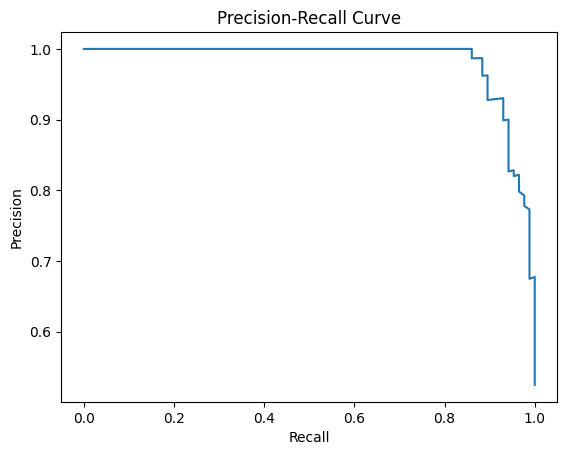

Threshold value that yields a precision value close to 0.95: 0.6257123417621641


In [72]:
#11
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# predict probabilities for the training set
y_train_proba = logreg.predict_proba(X_train)[:, 1]

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_train, y_train_proba)

# plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# find the threshold value that yields a precision value close to 0.95
for i in range(len(precision)):
    if precision[i] >= 0.95:
        print("Threshold value that yields a precision value close to 0.95:", thresholds[i])
        break


In [73]:
# 12 apply threshold value to predictions
y_train_pred_new = (y_train_proba >= 0.62)

# calculate confusion matrix for new predictions
conf_matrix_new = confusion_matrix(y_train, y_train_pred_new)

# fill in the table
tn = conf_matrix_new[0][0]
fp = conf_matrix_new[0][1]
fn = conf_matrix_new[1][0]
tp = conf_matrix_new[1][1]

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)


True Negative: 74
False Positive: 4
False Negative: 9
True Positive: 77


In [74]:
# 13 calculate accuracy score for new predictions
from sklearn.metrics import accuracy_score
acc_score_new = accuracy_score(y_train, y_train_pred_new)

print("Training score after post-processing:", acc_score_new)


Training score after post-processing: 0.9207317073170732


In [75]:
# 14 predict on the test set using the model with threshold
# predict probabilities on test set using logistic regression model
y_test_prob = logreg.predict_proba(X_test)[:,1]

y_test_pred_new = (y_test_prob >= 0.58).astype(int)

# calculate accuracy score for new predictions
acc_score_test_new = accuracy_score(y_test, y_test_pred_new)

print("Test score after post-processing:", acc_score_test_new)



Test score after post-processing: 0.8780487804878049


In [76]:
# 16 import numpy as np
import pandas as pd

# assume y_train is a pandas Series containing binary values
p_0 = (y_train == 0).mean()
p_1 = (y_train == 1).mean()

entropy_y_train = -p_0 * np.log2(p_0) - p_1 * np.log2(p_1)
print("Entropy of y_train:", entropy_y_train)


Entropy of y_train: 0.9982828462300606


In [77]:
# 17
from sklearn.tree import DecisionTreeClassifier

# Train a DecisionTreeClassifier on the training dataset
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Print the depth of the tree
print("Depth of the tree:", tree.get_depth())


Depth of the tree: 6


In [78]:
#!pip install graphviz


In [79]:
def count_pure_leaf_nodes(tree, node_id=0):
    """Count the number of pure leaf nodes in a decision tree."""
    left_child = tree.tree_.children_left[node_id]
    right_child = tree.tree_.children_right[node_id]

    if left_child == -1 and right_child == -1:
        # Leaf node
        node_value = tree.tree_.value[node_id]
        if node_value.max() == node_value.sum():
            # Only one class in the leaf node
            return 1
        else:
            return 0
    else:
        # Non-leaf node
        left_count = count_pure_leaf_nodes(tree, left_child)
        right_count = count_pure_leaf_nodes(tree, right_child)
        return left_count + right_count


In [80]:
#18
num_pure_leaves = count_pure_leaf_nodes(tree)
print("Number of pure leaf nodes:", num_pure_leaves)


Number of pure leaf nodes: 9


In [81]:
#20 
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier with max_depth = 1 and random_state = 0
tree = DecisionTreeClassifier(max_depth=1, random_state=0)

# Train the model on the training dataset
tree.fit(X_train, y_train)

# Compute the training and test score
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)

# Compute the score gap
score_gap = abs(train_score - test_score)

print("Score gap:", score_gap)


Score gap: 0.030487804878048808


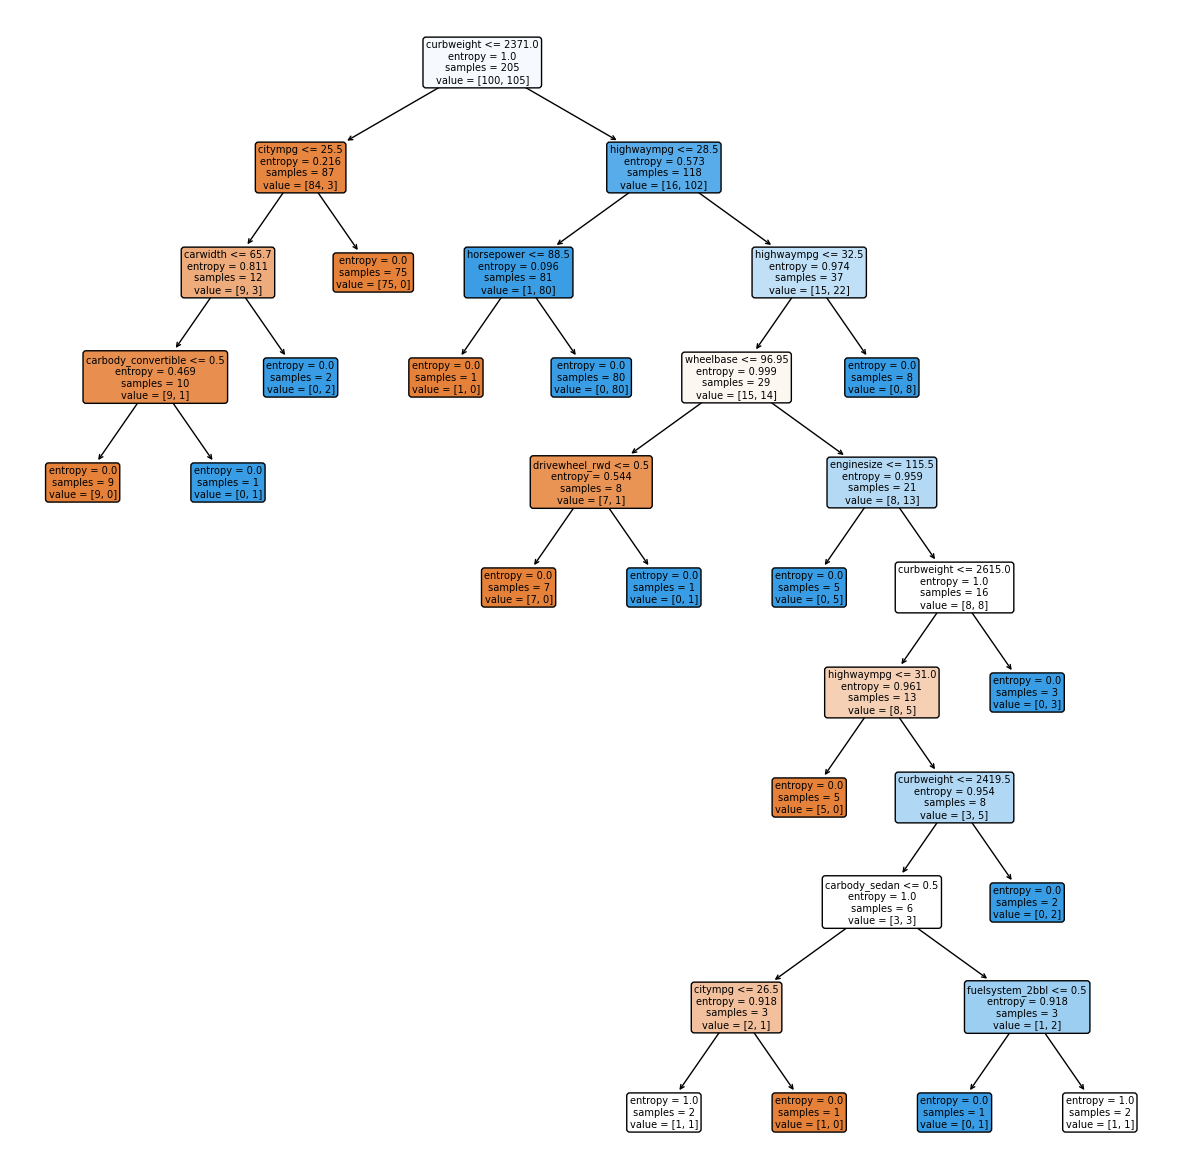

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0, criterion= 'entropy')
dt.fit(X,y)
from sklearn import tree 

plt.subplots(figsize = (15,15))
tree.plot_tree(dt, 
               feature_names=X.columns,  
               filled=True,
               rounded = True)
plt.show()

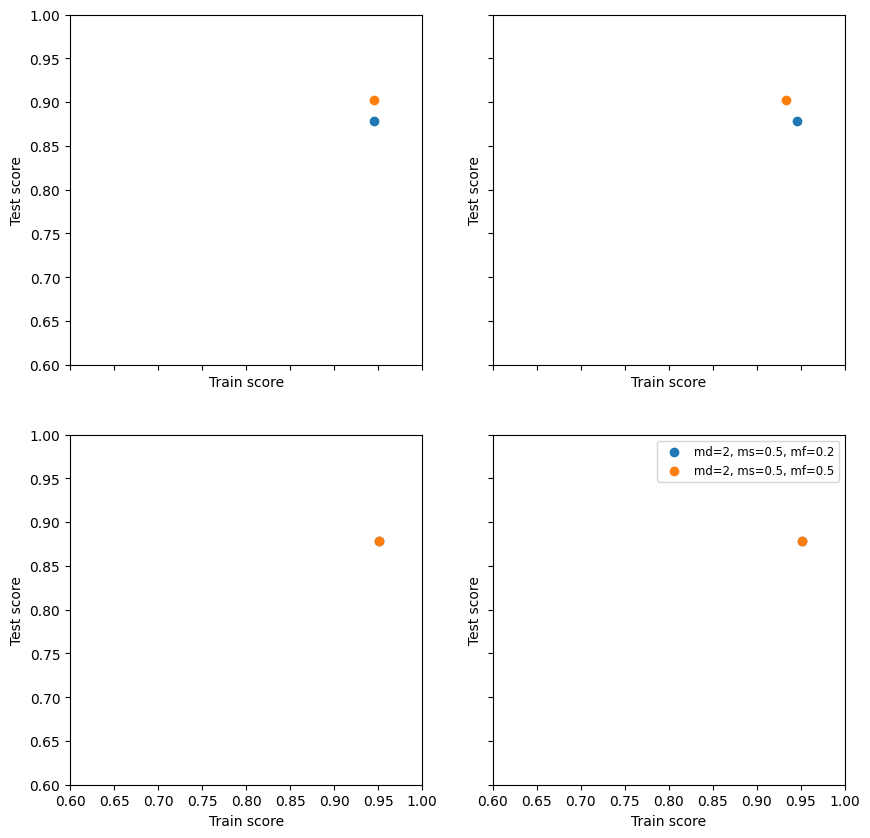

Best hyperparameters: max_depth=1, max_samples=0.5, max_features=0.5


In [83]:
#21 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameter values to test
max_depths = [1, 2]
max_samples = [0.2, 0.5]
max_features = [0.2, 0.5]

# Create lists to store train and test scores for each hyperparameter combination
train_scores = []
test_scores = []

# Loop over all hyperparameter combinations
for depth in max_depths:
    for samples in max_samples:
        for features in max_features:
            
            # Train a RandomForestClassifier with current hyperparameter combination
            rf = RandomForestClassifier(max_depth=depth, max_samples=samples, max_features=features, random_state=0)
            rf.fit(X_train, y_train)
            
            # Evaluate the model on the training set
            y_train_pred = rf.predict(X_train)
            train_score = accuracy_score(y_train, y_train_pred)
            
            # Evaluate the model on the test set
            y_test_pred = rf.predict(X_test)
            test_score = accuracy_score(y_test, y_test_pred)
            
            # Store the train and test scores
            train_scores.append(train_score)
            test_scores.append(test_score)

# Reshape the scores into a 2D array
train_scores = np.array(train_scores).reshape(len(max_depths), len(max_samples), len(max_features))
test_scores = np.array(test_scores).reshape(len(max_depths), len(max_samples), len(max_features))

# Find the hyperparameter combination with the smallest gap between train and test scores
score_gap = np.abs(train_scores - test_scores)
min_gap_index = np.unravel_index(score_gap.argmin(), score_gap.shape)
best_depth = max_depths[min_gap_index[0]]
best_samples = max_samples[min_gap_index[1]]
best_features = max_features[min_gap_index[2]]

# Plot the train and test scores for each hyperparameter combination
fig, axes = plt.subplots(nrows=len(max_depths), ncols=len(max_samples), figsize=(10, 10), sharex=True, sharey=True)
for i, depth in enumerate(max_depths):
    for j, samples in enumerate(max_samples):
        for k, features in enumerate(max_features):
            axes[i, j].scatter(train_scores[i, j, k], test_scores[i, j, k], label=f'md={depth}, ms={samples:.1f}, mf={features:.1f}')
            axes[i, j].set_xlabel('Train score')
            axes[i, j].set_ylabel('Test score')
            axes[i, j].set_xlim(0.6, 1.0)
            axes[i, j].set_ylim(0.6, 1.0)
plt.legend(loc='best', fontsize='small')
plt.show()

# Print the best hyperparameter combination
print(f'Best hyperparameters: max_depth={best_depth}, max_samples={best_samples}, max_features={best_features}')


In [84]:
#22
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with the best hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=1, max_samples=0.5, max_features=0.5, random_state=0)

# Train the model on the training dataset
rf.fit(X_train, y_train)

# Calculate the training score of the model
train_score = rf.score(X_train, y_train)

print("Training score: {:.2f}".format(train_score))


Training score: 0.93


In [85]:
# 23 predict on the test set
y_test_pred = rf.predict(X_test)

# calculate accuracy score
acc_score_test = accuracy_score(y_test, y_test_pred)

# print the test score
print("Test score of the best model:", acc_score_test)


Test score of the best model: 0.9024390243902439


In [86]:
# 24 Train a RandomForestClassifier with the best hyperparameters
rf = RandomForestClassifier(max_depth=1, max_samples=0.5, max_features=0.5, random_state=0)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a list of (feature, importance) tuples
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X.columns, importances)]

# Sort the list by importance
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print the top three features
print("Top three important features:")
for feature, importance in feature_importances[:3]:
    print(f"{feature}: {importance}")


Top three important features:
curbweight: 0.39
carwidth: 0.21
horsepower: 0.18
